In [1]:
###### Loading Packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage


####### Loading Data

data_big5= pd.read_excel('sample_survey_results.xlsx')

###### Setting display options

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

In [2]:
########################################
# inertia
########################################
def interia_plot(data, max_clust = 50):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        # FITTING to the data
        model.fit(data)


        # append each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()


########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

In [3]:
copy_data= data_big5

In [8]:
copy_data.shape


(10, 79)

In [ ]:
copy_data= data_big5

copy_data.shape

copy_data.drop(copy_data[copy_data['What is your age?']>28].index, inplace= True)

Nationalities=copy_data['What is your nationality? '].str.upper()

copy_data['Mac or Windows']=pd.get_dummies(copy_data['What laptop do you currently have?'])

print(data_big5['What is your age?'].value_counts())

print("\n\n")

print(data_big5['What program are you in?'].value_counts())

survey_responses = data_big5.iloc[:,1:72]
response_means = survey_responses.mean(axis = 0)
survey_mean = response_means.mean()

print("Average Answer for 'Display a growth mindset'")

print(survey_responses['Display a growth mindset'].mean(axis=0))

print("\n\n")

print("Average Answer for 'Build cooperative relationships'")
print(survey_responses['Build cooperative relationships'].mean(axis=0))

print("\n\n")

print("Average Answer for 'Work well with people from diverse cultural backgrounds'")
print(survey_responses['Work well with people from diverse cultural backgrounds'].mean(axis=0))

In [7]:
big_5=copy_data.iloc[:,1:51]

In [9]:
hult_dna=copy_data.iloc[:,52:72]

In [10]:
hult_dna

,Don't generate ideas that are new and different,Demonstrate an awareness of personal strengths and limitations,Display a growth mindset,Respond effectively to multiple priorities,"Take initiative even when circumstances, objectives, or rules aren't clear",Encourage direct and open discussions,Respond effectively to multiple priorities.1,"Take initiative even when circumstances, objectives, or rules aren't clear.1",Encourage direct and open discussions.1,Listen carefully to others,Don't persuasively sell a vision or idea,Build cooperative relationships,Work well with people from diverse cultural backgrounds,"Effectively negotiate interests, resources, and roles",Can't rally people on the team around a common goal,Translate ideas into plans that are organized and realistic,Resolve conflicts constructively,Seek and use feedback from teammates,Coach teammates for performance and growth,Drive for results
0,2,4,4,4,4,4,4,4,4,4,3,4,4,4,2,4,4,4,4,4
1,2,2,4,4,4,5,5,5,5,5,2,4,4,2,3,4,5,5,4,5
2,2,5,3,5,2,3,5,2,3,3,2,3,4,4,2,4,2,3,3,5
3,3,3,5,5,5,4,4,4,4,5,3,5,5,5,5,3,5,5,5,5
4,3,5,3,3,3,3,3,3,4,4,4,3,3,4,4,3,3,3,3,3
5,2,3,4,4,3,3,4,3,3,4,4,3,4,3,2,3,3,5,3,4
6,3,4,5,4,3,4,4,4,4,4,2,4,5,4,4,5,4,5,4,5
7,4,4,5,5,5,5,5,5,5,4,3,5,5,5,3,4,5,5,5,5
8,2,4,4,4,4,4,4,4,4,4,3,4,4,4,1,5,4,4,4,4
9,4,4,4,4,3,4,4,3,4,4,3,4,4,4,2,4,4,4,4,4


In [12]:
#### Scaling for Big 5
scaler= StandardScaler()

scaler.fit(big_5)

X_scaled= scaler.transform(big_5)

survey_scaled= pd.DataFrame(X_scaled)

survey_scaled.columns= big_5.columns

#print(pd.np.var(survey_scaled))

In [14]:
#### Scaling for Hult DNA
scaler= StandardScaler()

scaler.fit(hult_dna)

X_scaled= scaler.transform(hult_dna)

survey_scaled_2= pd.DataFrame(X_scaled)

survey_scaled_2.columns= hult_dna.columns

#print(pd.np.var(survey_scaled_2))

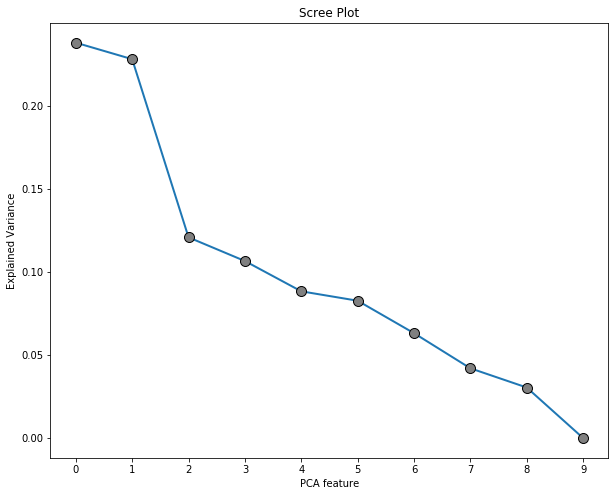

In [50]:
# INSTANTIATING a PCA object with no limit to principal components
pca_none = PCA(n_components= None,
          random_state = 802)


# FITTING and TRANSFORMING the scaled data
survey_responses_pca = pca_none.fit_transform(survey_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca_none)

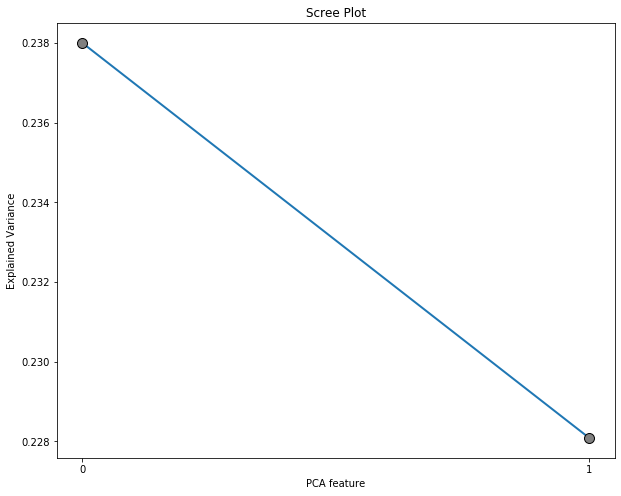

In [48]:
pca = PCA(n_components= 2,
          random_state = 802)


# FITTING and TRANSFORMING the scaled data
survey_responses_pca = pca.fit_transform(survey_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca)

In [109]:
pca.explained_variance_ratio_.cumsum()[1]

0.46609508681504386

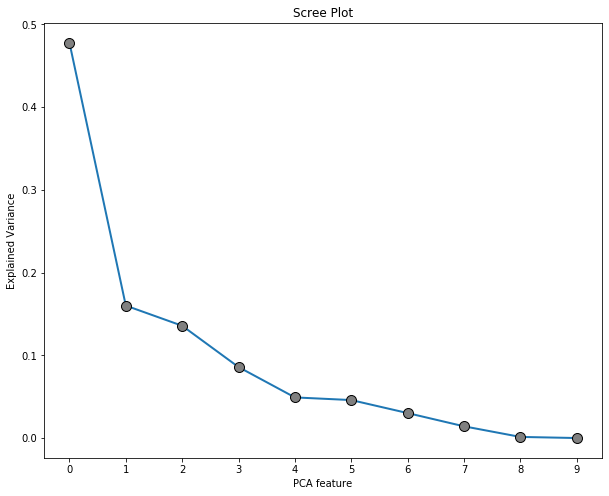

In [51]:
pca_none_2 = PCA(n_components= None,
          random_state = 802)


# FITTING and TRANSFORMING the scaled data
survey_responses_pca_none = pca_none_2.fit_transform(survey_scaled_2)


# calling the scree_plot function
scree_plot(pca_object = pca_none_2)

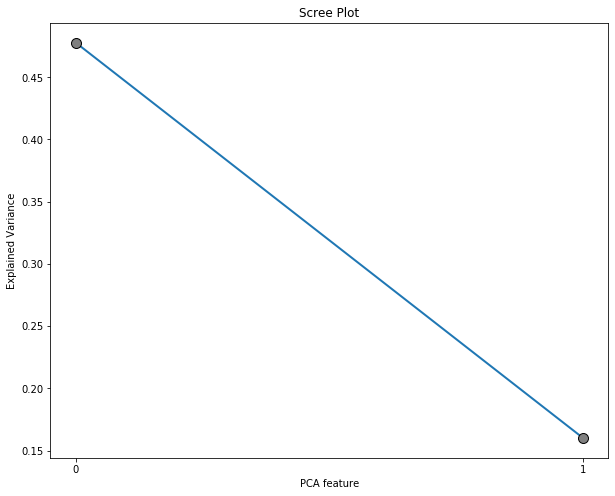

In [52]:
pca_2 = PCA(n_components= 2,
          random_state = 802)


# FITTING and TRANSFORMING the scaled data
survey_responses_pca_2 = pca_2.fit_transform(survey_scaled_2)


# calling the scree_plot function
scree_plot(pca_object = pca_2)

In [53]:
factor_loadings = pd.DataFrame(pd.np.transpose(pca.components_))


# naming rows as original features
factor_loadings = factor_loadings.set_index(survey_scaled.columns)

factor_loadings.to_excel('pca_factor_big5.xlsx')

In [54]:
factor_loadings_2 = pd.DataFrame(pd.np.transpose(pca_2.components_))


# naming rows as original features
factor_loadings_2 = factor_loadings_2.set_index(survey_scaled_2.columns)
factor_loadings_2.to_excel('pca_fact_hdna.xlsx')

In [55]:
factor_loadings.columns= ['The Beta',
                         'That Alpha']

factor_loadings_2.columns= ['The CEO',
                         'That Avoider']

In [58]:
# analyzing factor strengths per customer
X_pca_reduced = pca.transform(survey_scaled)


# converting to a DataFrame
X_pca_df = pd.DataFrame(X_pca_reduced)

# analyzing factor strengths per customer
X_pca_reduced_2 = pca_2.transform(survey_scaled_2)


# converting to a DataFrame
X_pca_df_2 = pd.DataFrame(X_pca_reduced_2)


# checking the results
#X_pca_df



In [78]:
survey_pca= pd.concat([X_pca_df, X_pca_df_2], axis= 1)
survey_pca

,0,1,0,1
0,-1.096495,2.162018,-0.349322,-0.363180
1,-2.733170,0.048185,2.878308,-0.061932
2,3.113967,6.671185,-4.237225,4.098897
3,-4.991339,-2.320550,3.938989,-1.172916
4,0.226601,-0.994762,-4.641445,-3.334529
5,-0.881857,-4.529393,-2.726134,-0.817287
6,-2.005331,-1.826990,1.447330,1.214419
7,8.388138,-4.280455,4.697270,0.521457
8,-0.516193,3.849463,-0.355583,0.242383
9,0.495678,1.221299,-0.652190,-0.327313


In [79]:
pd.np.var(survey_pca)

0    11.900616
1    11.404138
0     9.556211
1     3.201207
dtype: float64

In [80]:
scaler= StandardScaler()
scaler.fit(survey_pca)
X_scaled_pca= scaler.transform(survey_pca)
pca_scaled_df= pd.DataFrame(survey_pca)
pca_scaled_df.columns= ['The Beta',
                         'The Alpha',
                         'The CEO',
                       'The Avoider']

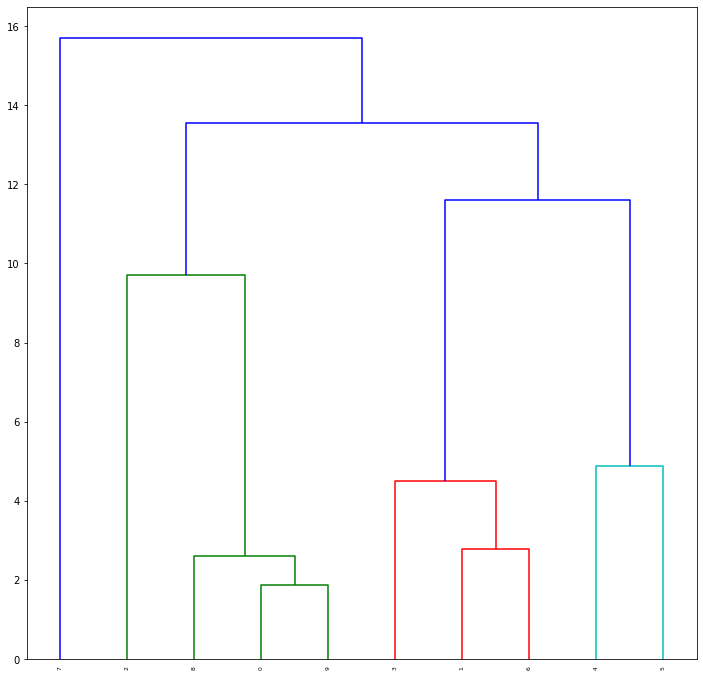

In [81]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_scaled_df,
                                 method = 'ward')


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# saving and displaying the plot
#plt.savefig('standard_hierarchical_clust_ward.png')
plt.show()

In [82]:
# INSTANTIATING a k-Means object with five clusters
survey_k_pca = KMeans(n_clusters = 3,
                        random_state = 802)


# fitting the object to the data
survey_k_pca.fit(pca_scaled_df)


# converting the clusters to a DataFrame
survey_kmeans_pca = pd.DataFrame({'Cluster': survey_k_pca.labels_})


# checking the results
print(survey_kmeans_pca.iloc[: , 0].value_counts())

2    5
0    4
1    1
Name: Cluster, dtype: int64


In [83]:
# storing cluster centers
centroids_pca = survey_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = ['The Beta',
                         'The Alpha',
                         'The CEO',
                       'The Avoider']

# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,The Beta,The Alpha,The CEO,The Avoider
0,-2.65,-2.16,1.38,-0.21
1,8.39,-4.28,4.70,0.52
2,0.44,2.58,-2.05,0.06


In [108]:
# concatinating cluster memberships with principal components
clst_pca_df = pd.concat([survey_kmeans_pca,
                          survey_pca],
                          axis = 1)


# checking results
clst_pca_df


# concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([data_big5.loc[ : , ['What program are you in?', 'What laptop do you currently have?', 
                                                    'What laptop would you buy in next assuming if all laptops cost the same?',
                                                   'What is your age?']],
                                  clst_pca_df],
                                  axis = 1)


# renaming columns
final_pca_clust_df.columns = ['Program',
                              'Current Laptop',
                              'Purchase Behavior',
                              'Age',
                              'Cluster',
                              'The Beta',
                              'The Alpha',
                              'The CEO',
                             'The Avoider']


# checking the results
print(final_pca_clust_df.head(n = 5))



                            Program  Current Laptop Purchase Behavior  Age  Cluster  The Beta  The Alpha   The CEO  The Avoider
0     DD (MIB & Business Analytics)         Macbook           Macbook   25        2 -1.096495   2.162018 -0.349322    -0.363180
1       One year Business Analytics  Windows laptop    Windows laptop   27        0 -2.733170   0.048185  2.878308    -0.061932
2       One year Business Analytics  Windows laptop    Windows laptop   25        2  3.113967   6.671185 -4.237225     4.098897
3       One year Business Analytics  Windows laptop    Windows laptop   26        0 -4.991339  -2.320550  3.938989    -1.172916
4  DD (MBA & Disruptive innovation)         Macbook    Windows laptop   27        2  0.226601  -0.994762 -4.641445    -3.334529


In [85]:
cluster_names = {0 : 'Cluster 1',
                 1 : 'Cluster 2',
                 2 : 'Cluster 3'}


final_pca_clust_df['Cluster'].replace(cluster_names, inplace = True)

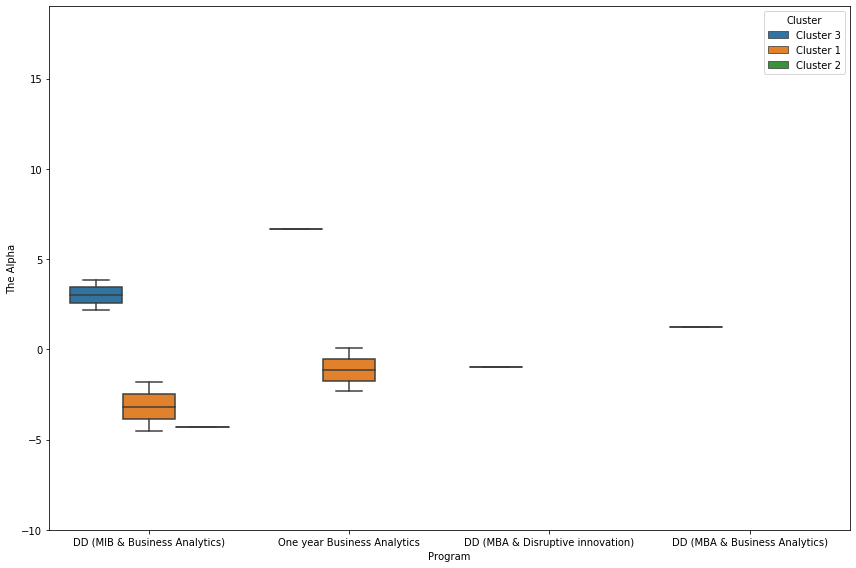

In [87]:
# Alphas
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Program',
            y = 'The Alpha',
            hue = 'Cluster',
            data = final_pca_clust_df)

plt.ylim(-10, 19)
plt.tight_layout()
plt.show()

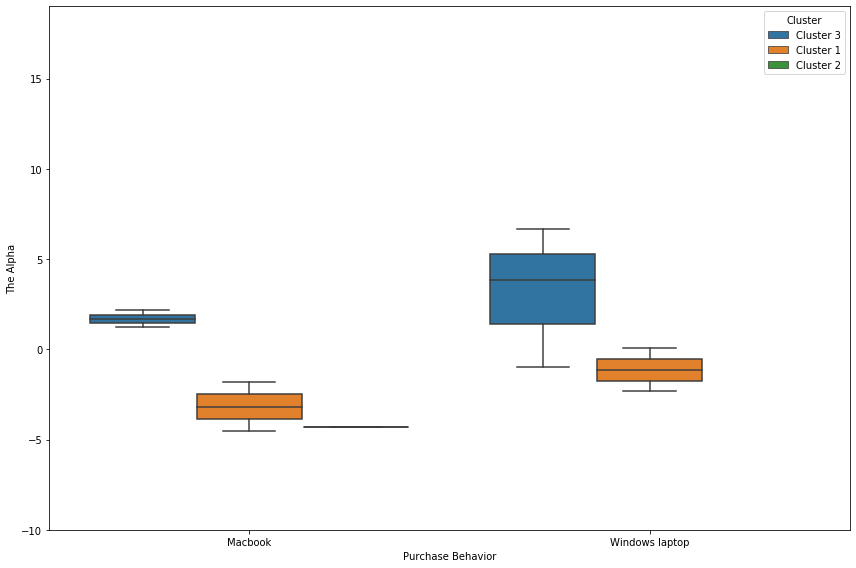

In [88]:
# Purchasing Behavior
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Purchase Behavior',
            y = 'The Alpha',
            hue = 'Cluster',
            data = final_pca_clust_df)

plt.ylim(-10, 19)
plt.tight_layout()
plt.show()

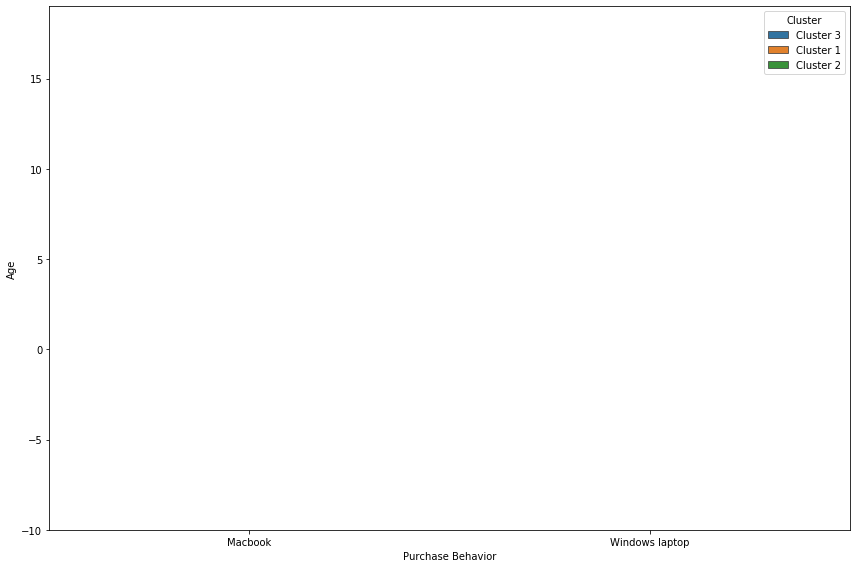

In [104]:
# Purchasing Behavior
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Purchase Behavior',
            y = 'Age',
            hue = 'Cluster',
            data = final_pca_clust_df)

plt.ylim(-10, 19)
plt.tight_layout()
plt.show()

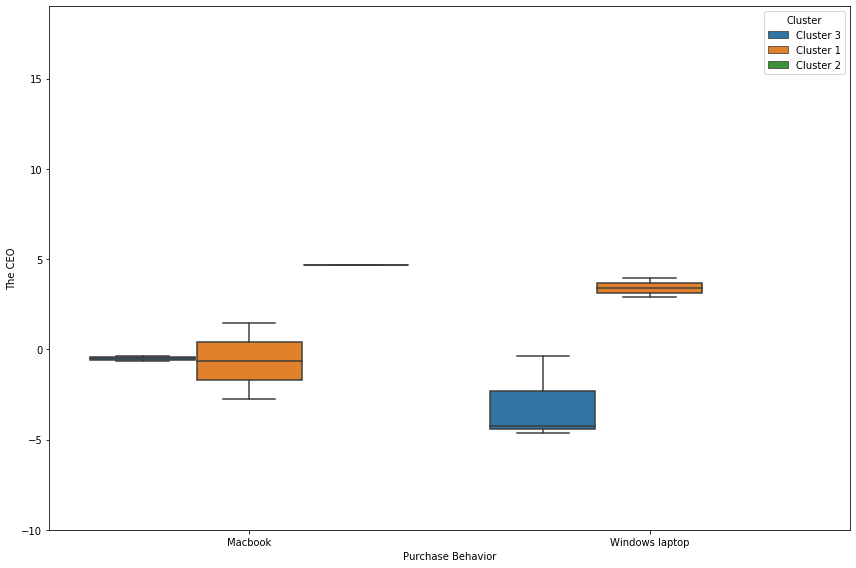

In [91]:
# Purchasing Behavior
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Purchase Behavior',
            y = 'The CEO',
            hue = 'Cluster',
            data = final_pca_clust_df)

plt.ylim(-10, 19)
plt.tight_layout()
plt.show()

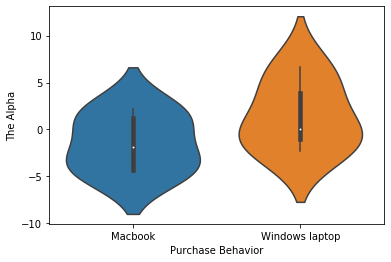

In [103]:
ax = sns.violinplot(x="Purchase Behavior", y="The Alpha", data=final_pca_clust_df)

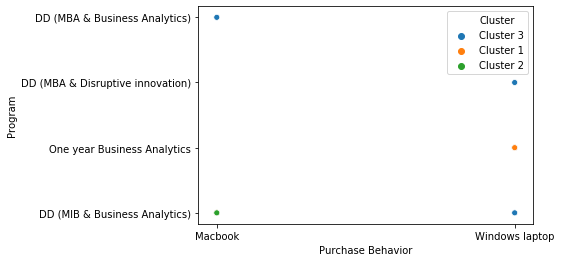

In [98]:
ax = sns.scatterplot(x="Purchase Behavior", y="Program", hue= "Cluster", data=final_pca_clust_df)